In [8]:
import numpy as np
import pandas as pd 
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()

In [2]:
df_aisles = pd.read_csv("./data/aisles/aisles.csv")
df_departments = pd.read_csv("./data/departments/departments.csv")
df_order_products = pd.read_csv("./data/order_products/order_products.csv")
df_orders = pd.read_csv("./data/orders/orders.csv")
df_products = pd.read_csv("./data/products/products.csv")

In [17]:
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [18]:
df_order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
33819101,3421063,14233,3
33819102,3421063,35548,4
33819103,3421070,35951,1
33819104,3421070,16953,2


In [3]:
df1 = pd.merge(df_orders, df_order_products, on="order_id", how="inner")
df2 = pd.merge(df1, df_products, on="product_id")
df3 = pd.merge(df2, df_aisles, on="aisle_id")
df_all = pd.merge(df3, df_departments, on="department_id")
df_all

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle,department
0,2539329,1,1,2,8,NaN,196,1,Soda,77,7,soft drinks,beverages
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7,soft drinks,beverages
2,473747,1,3,3,12,21.0,196,1,Soda,77,7,soft drinks,beverages
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7,soft drinks,beverages
4,431534,1,5,4,15,28.0,196,1,Soda,77,7,soft drinks,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2939884,130327,3,1,13,0.0,27414,5,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819102,3267360,150683,1,5,16,NaN,27414,13,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819103,414077,159238,9,6,12,8.0,27414,1,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819104,813243,171675,13,2,6,13.0,27414,34,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk


### Q1

In [4]:
df_all.groupby('user_id').product_id.nunique().mode()

0    26
dtype: int64

In [8]:
print(("There are " + str(df_all.groupby('user_id').product_id.nunique().mode()) + " products that people usually order"))

There are 0    26
dtype: int64 products that people usually order


### Q2

In [19]:
df_all['product_name'].mode()
print("Products banana are orderd the most")

Products banana are orderd the most


### Q3

In [57]:
df_test = df_all[['add_to_cart_order', 'product_name']]
df_test

,add_to_cart_order,product_name
0,1,Soda
1,1,Soda
2,1,Soda
3,1,Soda
4,1,Soda
...,...,...
33819101,5,Organic Emmer Farro
33819102,13,Organic Emmer Farro
33819103,1,Organic Emmer Farro
33819104,34,Organic Emmer Farro


In [60]:
df_test[df_test['add_to_cart_order'] == 1].product_name.mode()

0    Banana
dtype: object

### Q4

In [4]:
df4 = df_orders[['user_id', 'order_hour_of_day']]
df4

,user_id,order_hour_of_day
0,1,8
1,1,7
2,1,12
3,1,7
4,1,15
...,...,...
3421078,206209,18
3421079,206209,10
3421080,206209,12
3421081,206209,12


In [12]:
group = df4.order_hour_of_day.value_counts()
group

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

/Users/Mark/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

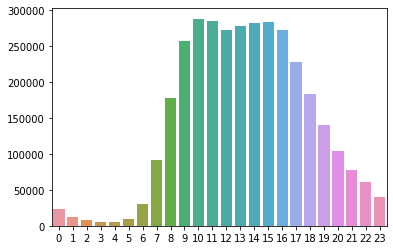

In [13]:
sns.barplot(group.index, group.values)

In [14]:
print("People usually order products at 10 o'clock.")

People usually order products at 10 o'clock.
